In [ ]:
1 school — аббревиатура школы, в которой учится ученик
2 sex — пол ученика ('F' - женский, 'M' - мужской)
3 age — возраст ученика (от 15 до 22)
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16 schoolsup — дополнительная образовательная поддержка (yes или no)
17 famsup — семейная образовательная поддержка (yes или no)
18 paid — дополнительные платные занятия по математике (yes или no)
19 activities — дополнительные внеучебные занятия (yes или no)
20 nursery — посещал детский сад (yes или no)
21 higher — хочет получить высшее образование (yes или no)
22 internet — наличие интернета дома (yes или no)
23 romantic — в романтических отношениях (yes или no)
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28 absences — количество пропущенных занятий
29 score — баллы по госэкзамену по математике

Рекомендации по выполнению проекта

    Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
    Посмотрите на распределение признака для числовых переменных, устраните выбросы.
    Оцените количество уникальных значений для номинативных переменных.
    По необходимости преобразуйте данные
    Проведите корреляционный анализ количественных переменных
    Отберите не коррелирующие переменные.
    Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
    Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [34]:
stud = pd.read_csv('stud_math.csv')

In [6]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [13]:
print(stud.groupby(['school'])['score'].mean().sort_values(ascending=False))
print(stud.groupby(['sex'])['score'].mean().sort_values(ascending=False))
print(stud.groupby(['age'])['score'].mean().sort_values(ascending=False))

school
GP    52.630814
MS    49.444444
Name: score, dtype: float64
sex
M    54.648649
F    50.098039
Name: score, dtype: float64
age
20    70.000000
15    56.280488
16    55.194175
17    51.377551
18    48.312500
19    40.238095
22    40.000000
21    35.000000
Name: score, dtype: float64


In [26]:
#сделаю функцию для первичного осмотра данных по всем колонкам (ищем пустые значения и явные отклонения значений)
def value_counts_all_column(column):
    display(stud.loc[:, column].value_counts(dropna=False))

for col in list(stud):
    value_counts_all_column(col) 
    
#Fedu 1 выброс значение 40
#famrel 1 выброс значение - 1

GP    349
MS     46
Name: school, dtype: int64

F    208
M    187
Name: sex, dtype: int64

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

U      295
R       83
NaN     17
Name: address, dtype: int64

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

T      314
NaN     45
A       36
Name: Pstatus, dtype: int64

4.0    131
2.0    102
3.0     97
1.0     59
NaN      3
0.0      3
Name: Medu, dtype: int64

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

no     200
yes    155
NaN     40
Name: paid, dtype: int64

yes    195
no     186
NaN     14
Name: activities, dtype: int64

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

-6.0     194
-3.0     103
-9.0      64
-12.0     27
 NaN       7
Name: studytime, granular, dtype: int64

yes    356
NaN     20
no      19
Name: higher, dtype: int64

yes    305
no      56
NaN     34
Name: internet, dtype: int64

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
NaN       12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
11.0       2
15.0       2
56.0       1
24.0       1
23.0       1
25.0       1
19.0       1
17.0       1
75.0       1
21.0       1
212.0      1
26.0       1
30.0       1
40.0       1
28.0       1
385.0      1
38.0       1
54.0       1
Name: absences, dtype: int64

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [35]:
#уберем выбросы
stud = stud.loc[stud.Fedu != 40]
stud = stud.loc[stud.famrel != -1]

count    387.000000
mean      52.273902
std       22.966464
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

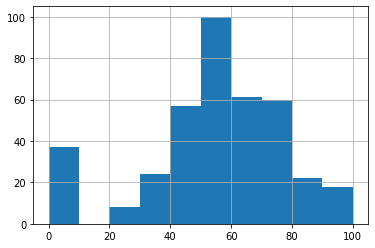

In [36]:
#stud.loc[:,['Fedu']].info()
stud.score.hist()
stud.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


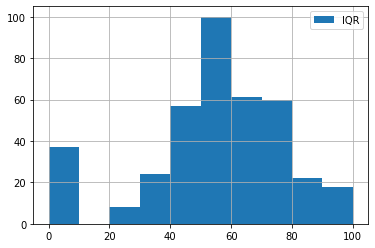

In [48]:
#посмотрим можно ли найти и убрать выбрасы по методу межкаваритных интервалов
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 100), label = 'IQR')
 
plt.legend();

#значений попадающих за границы выбросов нет

In [38]:
#определим корреляцию числовых столбцов
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.165627,-0.160373,0.089718,-0.013463,0.232135,0.013463,0.068105,0.023114,0.130988,-0.063539,0.093778,-0.155802
Medu,-0.165627,1.000000,0.629666,-0.171961,0.078798,-0.244267,-0.078798,-0.018722,0.020942,0.060801,-0.042575,-0.011696,0.213341
Fedu,-0.160373,0.629666,1.000000,-0.156499,0.007017,-0.270989,-0.007017,-0.035788,-0.023110,0.045335,0.024129,0.023534,0.129376
traveltime,0.089718,-0.171961,-0.156499,1.000000,-0.112740,0.072945,0.112740,-0.036414,-0.016291,0.042579,-0.022214,-0.047185,-0.074205
studytime,-0.013463,0.078798,0.007017,-0.112740,1.000000,-0.171826,-1.000000,0.025293,-0.123232,-0.051818,-0.078018,-0.025294,0.113496
failures,0.232135,-0.244267,-0.270989,0.072945,-0.171826,1.000000,0.171826,0.013545,0.105687,0.127014,0.075764,0.055896,-0.343385
"studytime, granular",0.013463,-0.078798,-0.007017,0.112740,-1.000000,0.171826,1.000000,-0.025293,0.123232,0.051818,0.078018,0.025294,-0.113496
famrel,0.068105,-0.018722,-0.035788,-0.036414,0.025293,0.013545,-0.025293,1.000000,0.169108,0.072736,0.096879,-0.081439,0.050228
freetime,0.023114,0.020942,-0.023110,-0.016291,-0.123232,0.105687,0.123232,0.169108,1.000000,0.291760,0.066677,0.009869,0.018501
goout,0.130988,0.060801,0.045335,0.042579,-0.051818,0.127014,0.051818,0.072736,0.291760,1.000000,-0.011939,-0.048501,-0.130630


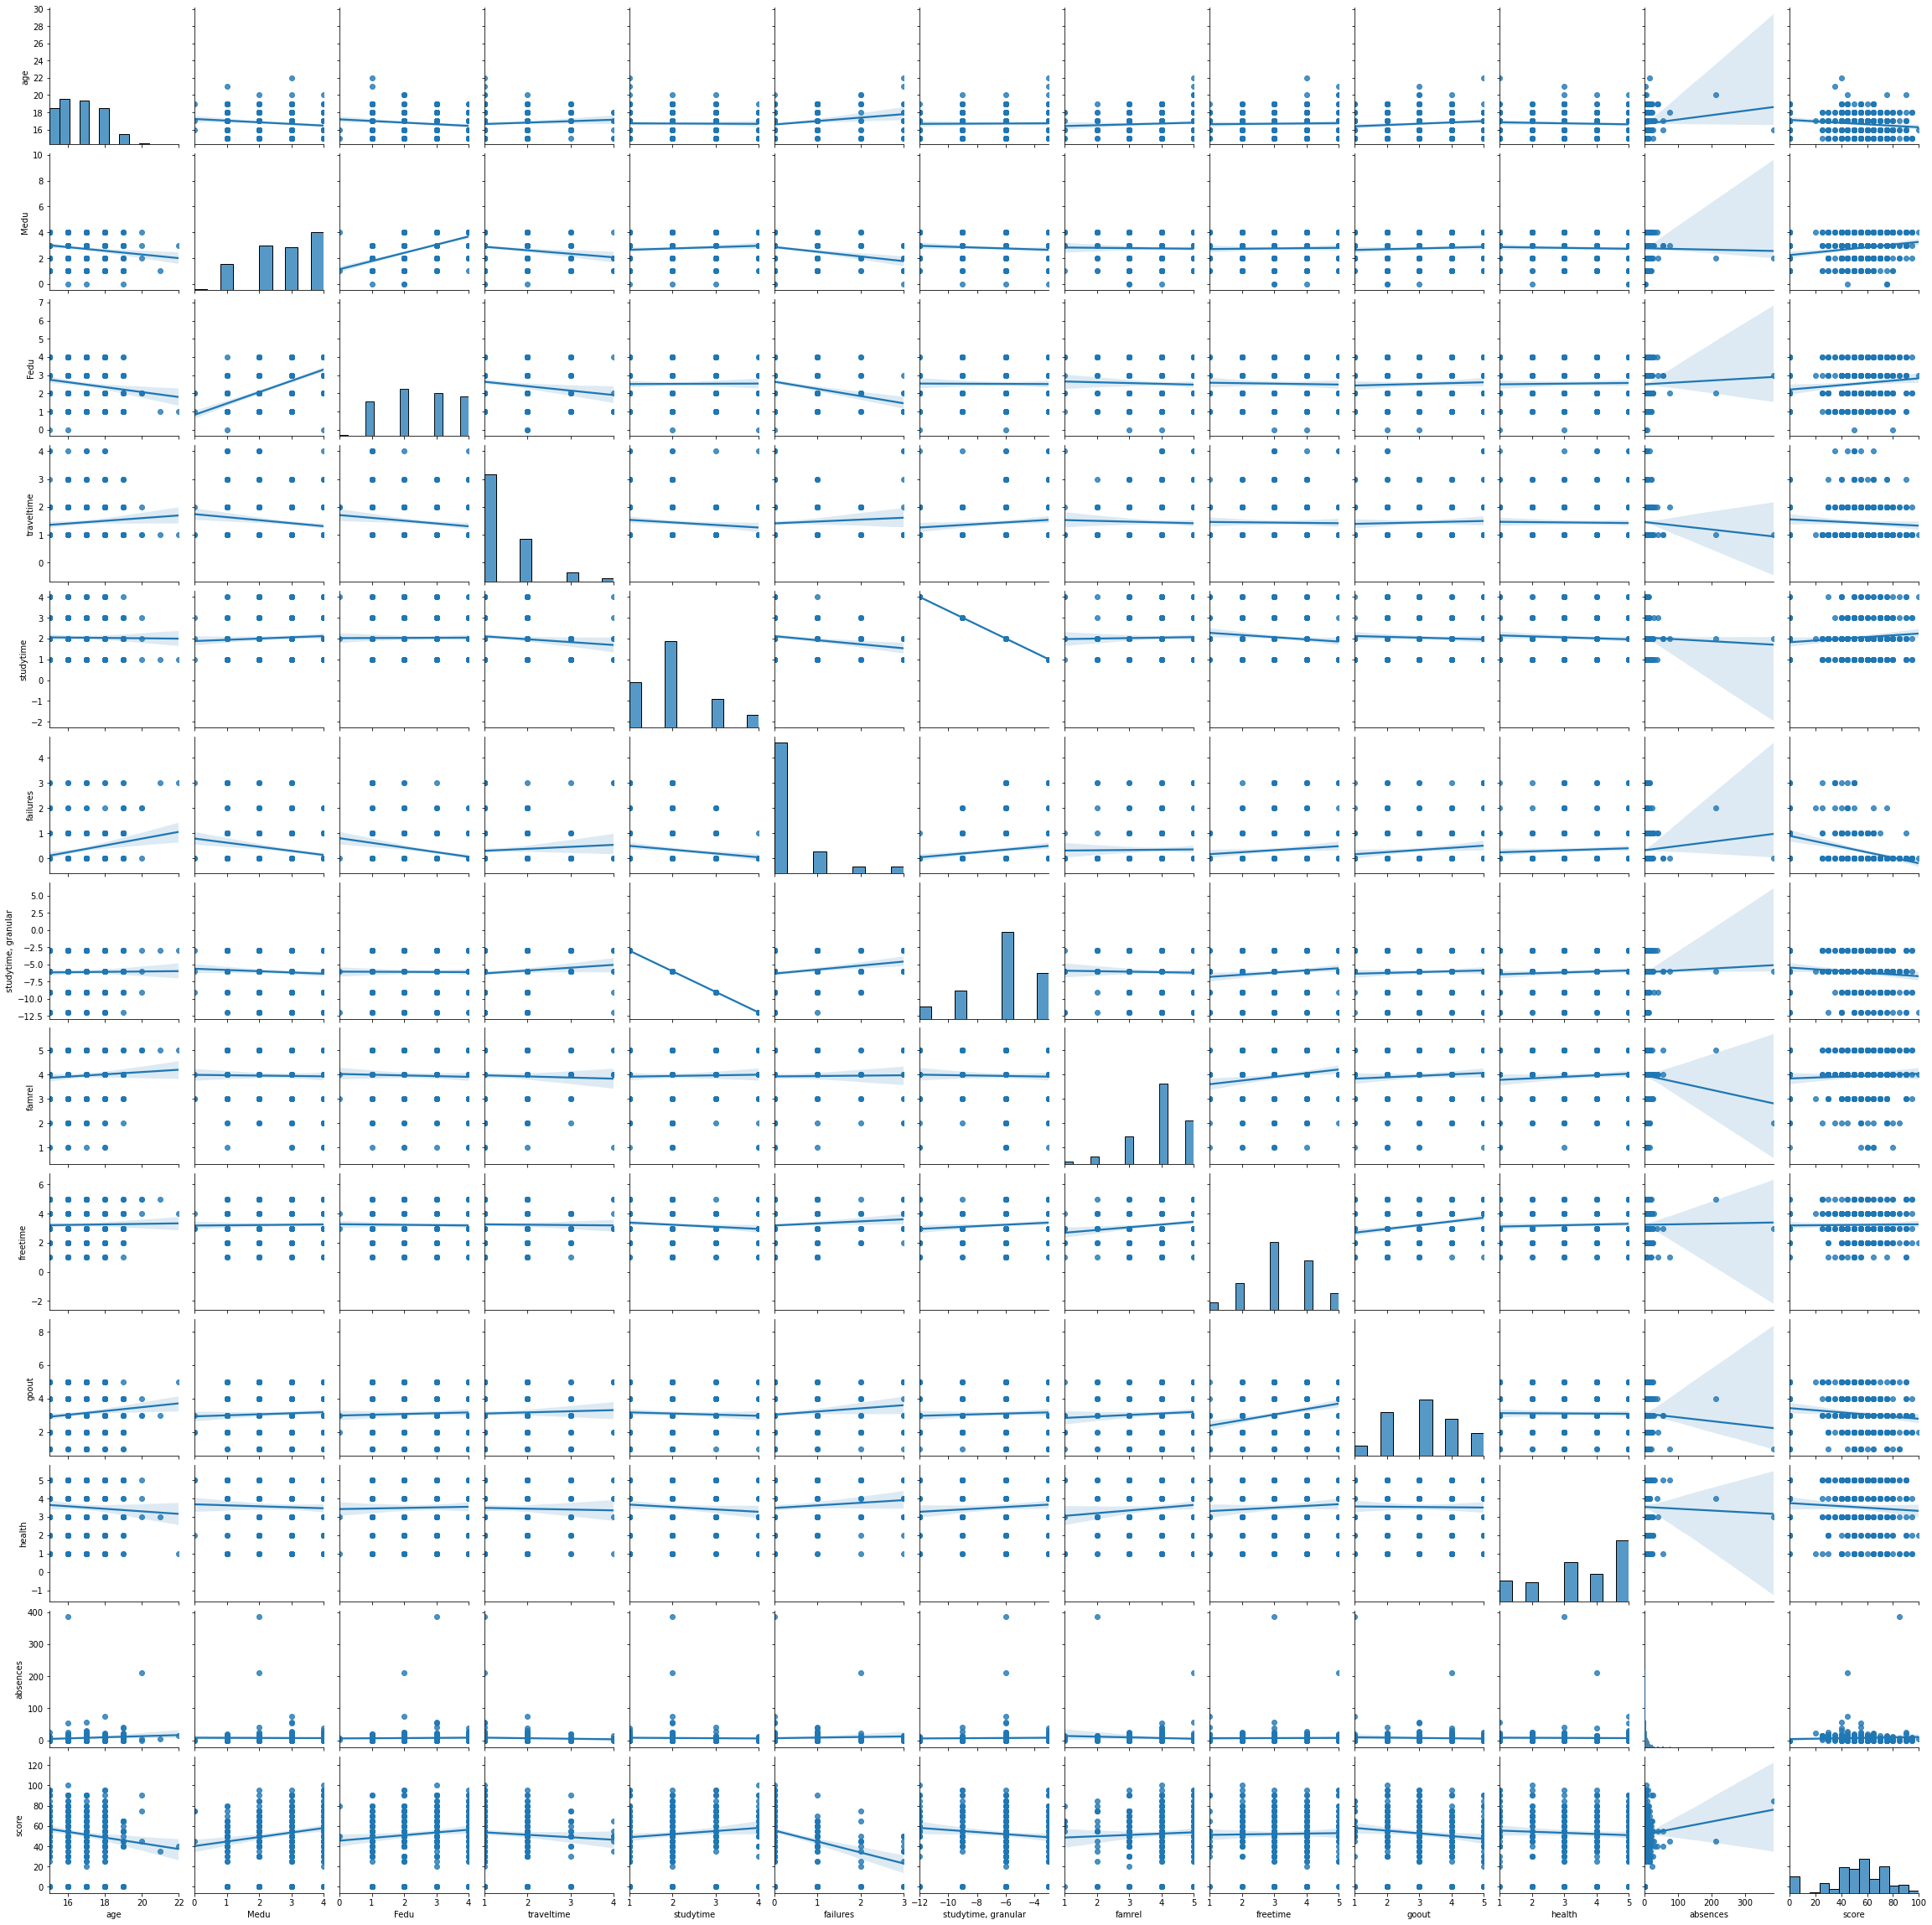

In [52]:
sns.pairplot(stud, kind = 'reg')

In [ ]:
# Выводы ч1.
# значение баллов наиболее скорреклированы с:
# образованием матери, отца, количество внеучебных неудач, возраст, время с друзьями
# соответственно для модели желательно оставить эти поля: Medu, Fedu, goout,failures,age, goout

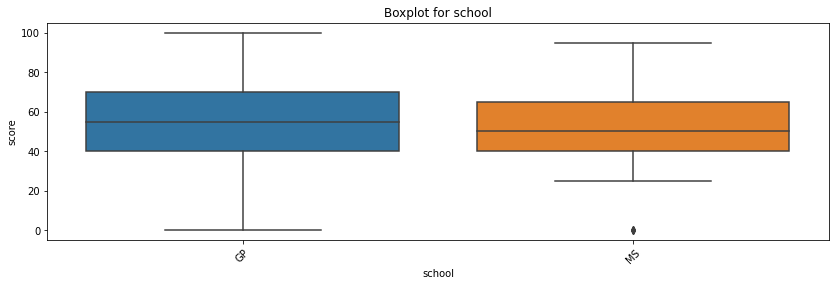

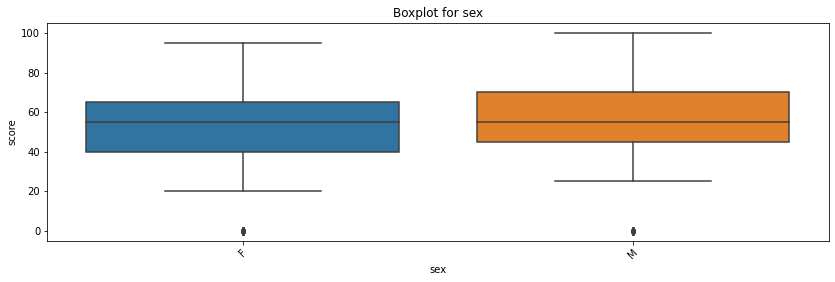

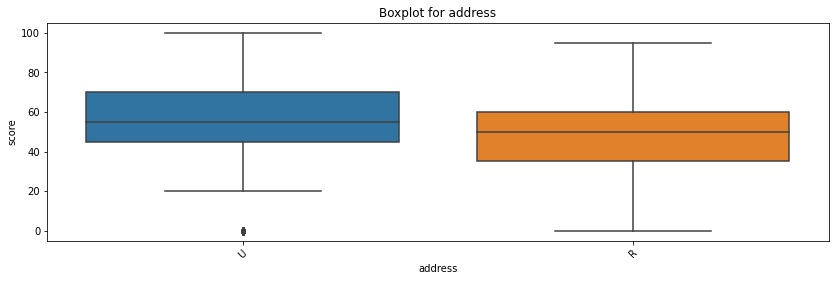

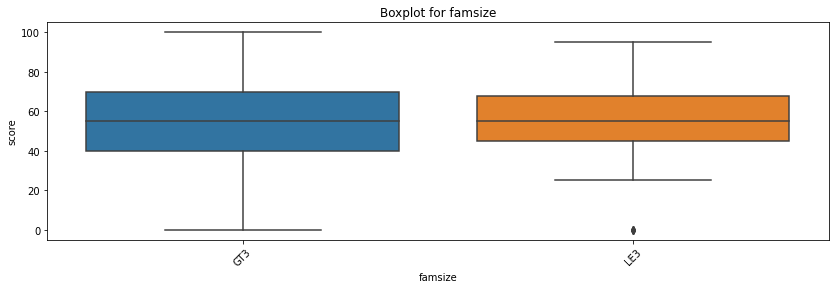

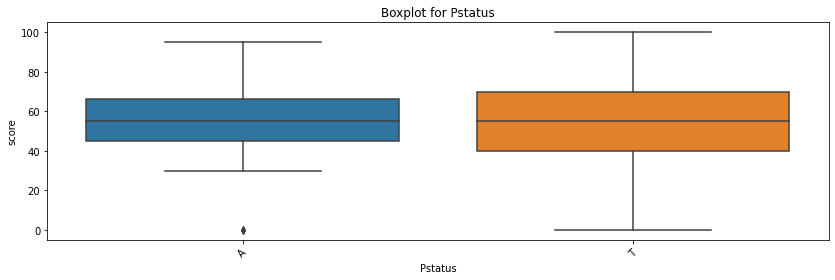

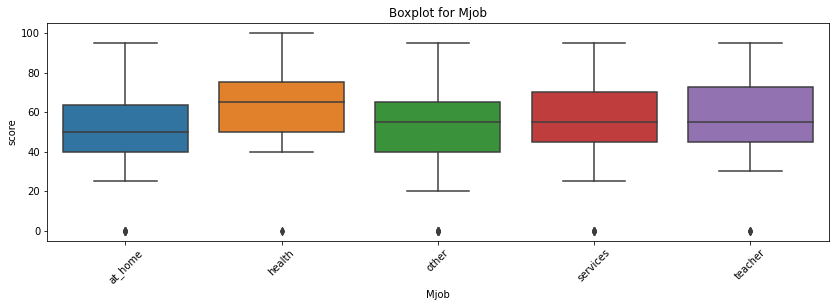

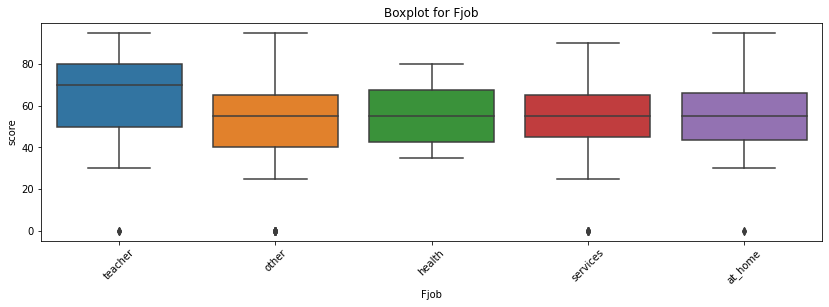

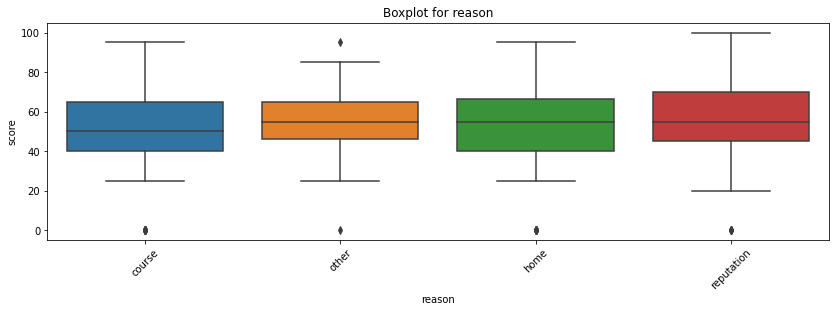

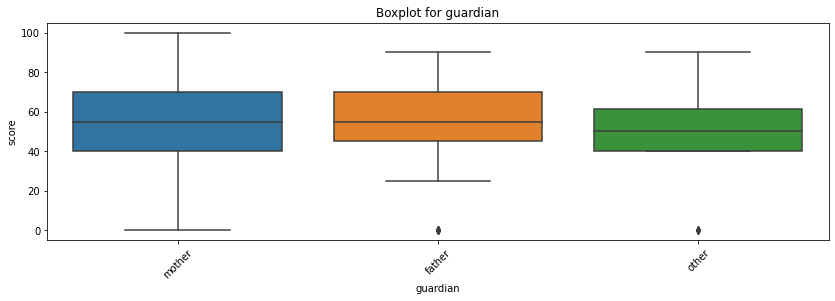

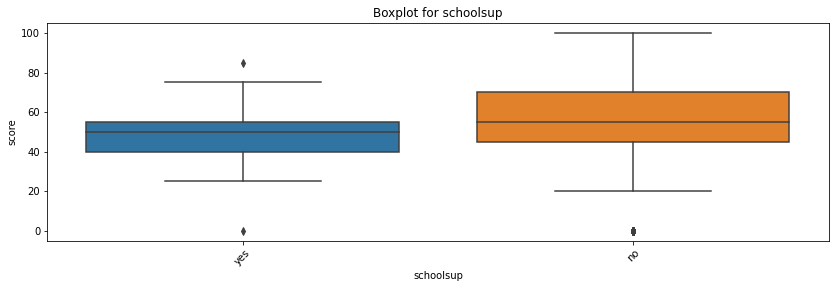

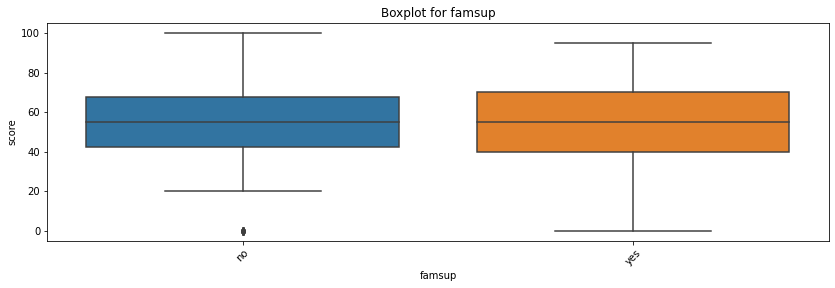

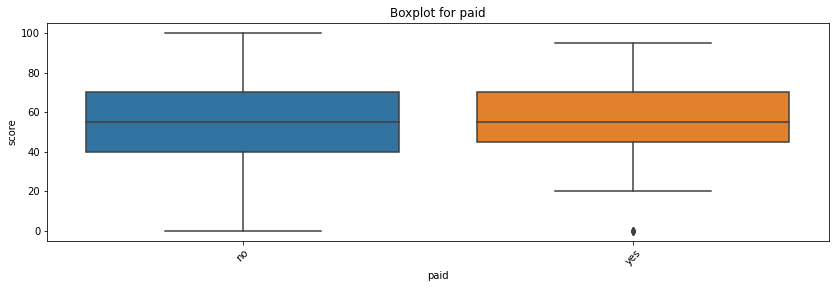

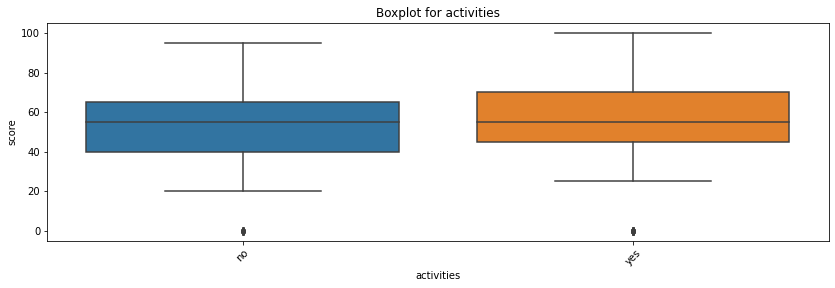

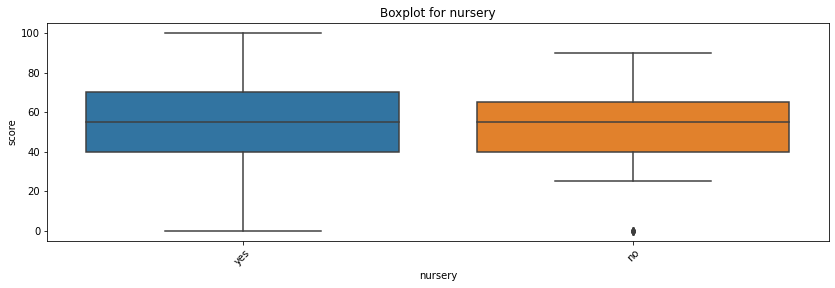

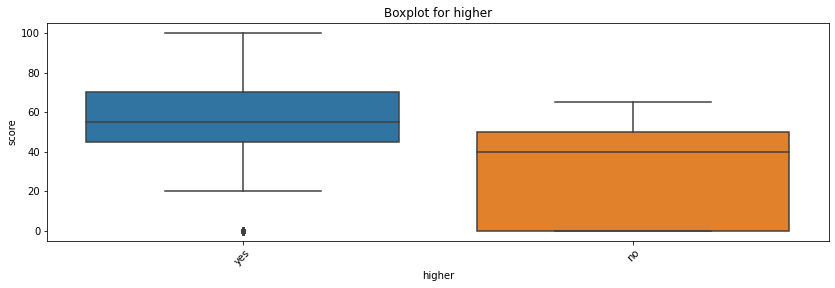

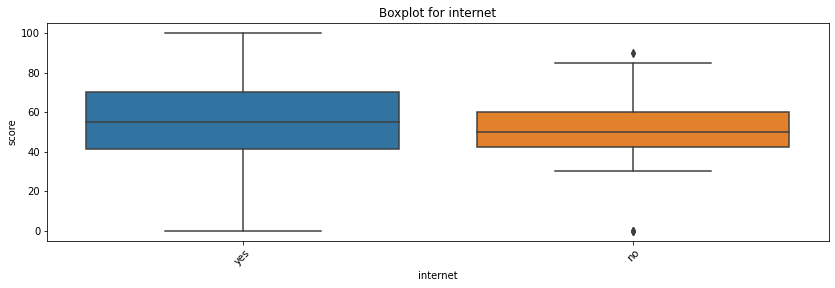

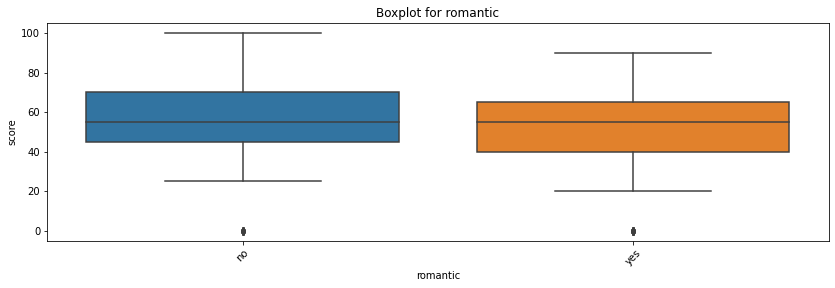

In [41]:
#Анализ номинативных переменных для значений упомянутых более 10 раз
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
df_object = stud.select_dtypes(include='object')
for col in list(df_object):
    get_boxplot(col)   

In [51]:
#Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, 
#с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов за экзамен 
#по различным параметрам неразличимы:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
df_object = stud.select_dtypes(include='object')
for col in list(df_object):
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [ ]:
# Выводы ч2.
# графики визуально выделяют параметры: работа матери, работа отца, желание получить высшее образование
# соответственно для модели желательно оставить эти 3 поля: Mjob, Fjob, higher 

In [54]:
#Итоги. Весьма интересны.
#данные были достаточно чистые, заполнение по моему мнению не целесообразно и всего 2 выброса
#Успехи в учебе сильно зависят (положительно) от образования  работы родителей, от амбиций самого школьника, 
#отрицательно зависит от времени проведенного с друзьями и внеучебных происшествий

stud_for_model = stud.loc[:, ['Medu', 'Fedu', 'goout','failures','age', 'goout','Mjob', 'Fjob', 'higher','score']]
stud_for_model.head()


,Medu,Fedu,goout,failures,age,goout,Mjob,Fjob,higher,score
0,4.0,4.0,4.0,0.0,18,4.0,at_home,teacher,yes,30.0
1,1.0,1.0,3.0,0.0,17,3.0,at_home,other,yes,30.0
2,1.0,1.0,2.0,3.0,15,2.0,at_home,other,yes,50.0
3,4.0,2.0,2.0,0.0,15,2.0,health,NaN,yes,75.0
4,3.0,3.0,2.0,0.0,16,2.0,other,other,yes,50.0
